In [198]:
# Standard Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

## 1.DATA EXPLORATION

In [199]:
data=pd.read_csv("airways.csv",encoding='latin1')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [200]:
data.shape

(50000, 14)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## 2.DATA PREPROCESSING

2.1.Checking for null values

In [202]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

No null values in our dataset

2.2.Feature Encoding

In [203]:
data = data.drop_duplicates()

In [204]:
# Separating categorical and numerical columns
data_categorical = data.select_dtypes(include="object")
data_numerical = data.select_dtypes(exclude="object")

In [205]:
data_categorical.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [206]:
for col in data_categorical:
    print(data_categorical[col].value_counts())
    print("\n")

sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64


trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64


flight_day
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64


route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64


booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64




In [207]:
data_categorical.columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [208]:
columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for value in columns:
    data_categorical=pd.get_dummies(data_categorical, columns=[value],drop_first=True)

In [209]:
data_categorical.shape

(49281, 910)

In [210]:
data_categorical.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


2.3.Outlier detection

In [211]:
data_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


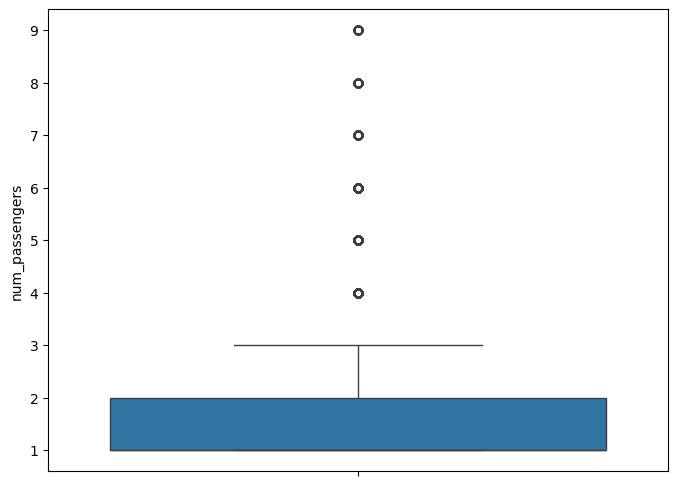

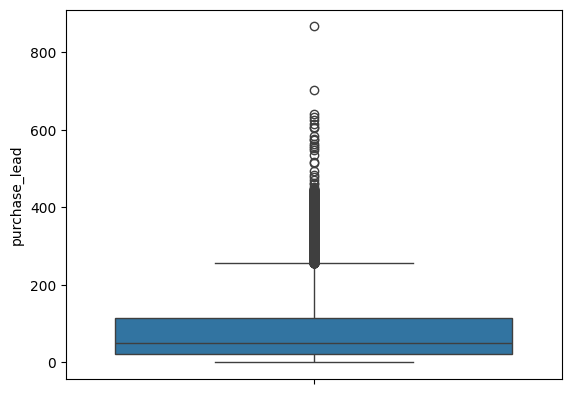

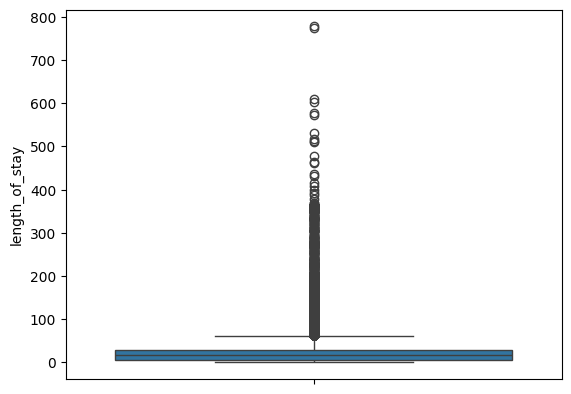

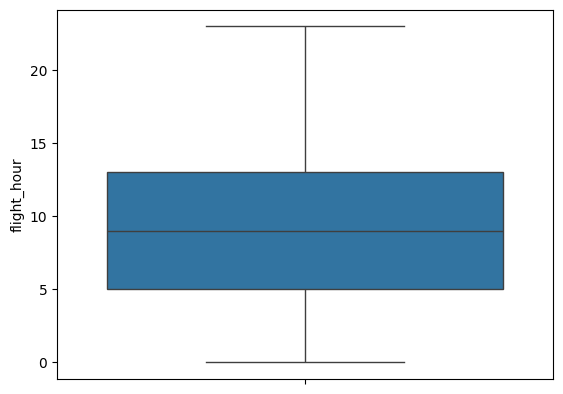

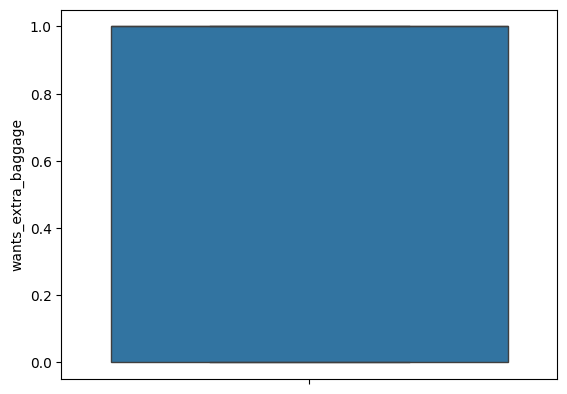

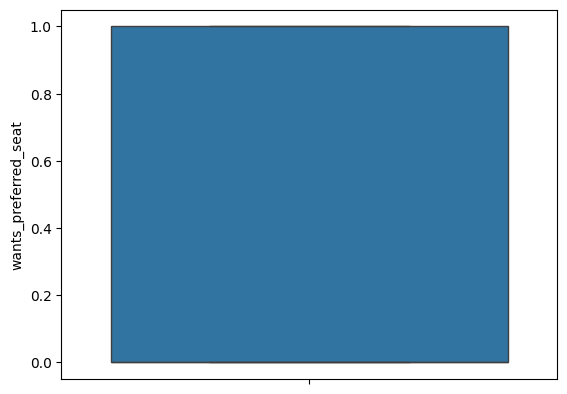

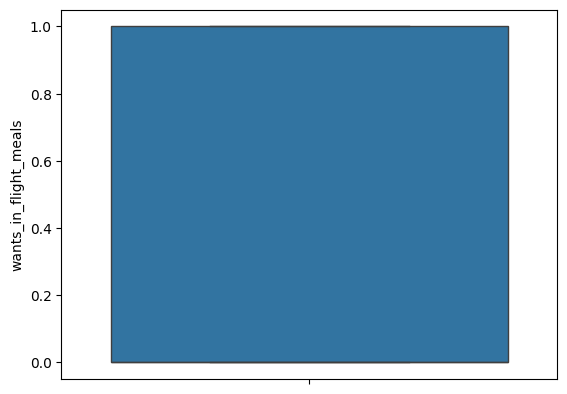

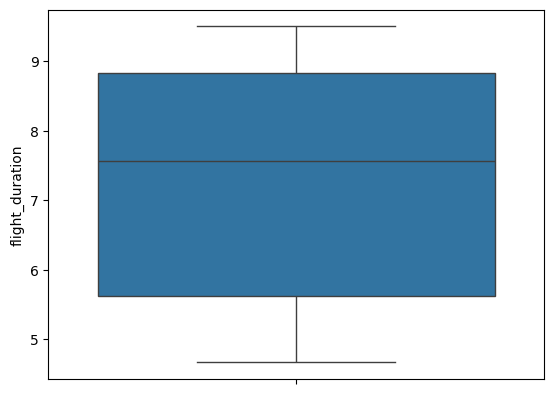

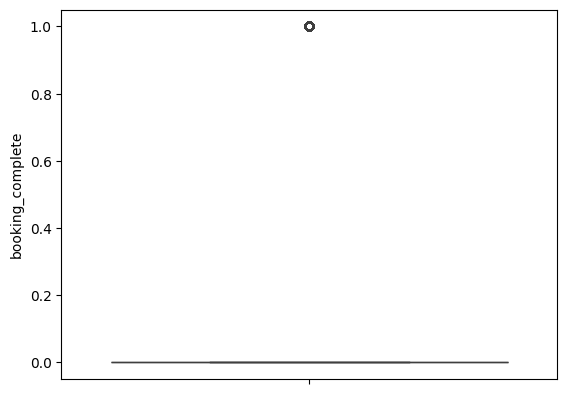

In [212]:
# Plotting boxplot for detecting outliers
plt.figure(figsize=(8,6))
for c in data_numerical.columns:
    sns.boxplot(data = data_numerical[c])
    plt.show()

In [213]:
lower_percentile = 0.01
upper_percentile = 0.83

for feature in data_numerical.columns:
    lower_limit = data_numerical[feature].quantile(lower_percentile)
    upper_limit = data_numerical[feature].quantile(upper_percentile)

    # Filter out the outliers
    data_numerical = data_numerical[(data_numerical[feature] >= lower_limit) & (data_numerical[feature] <= upper_limit)]

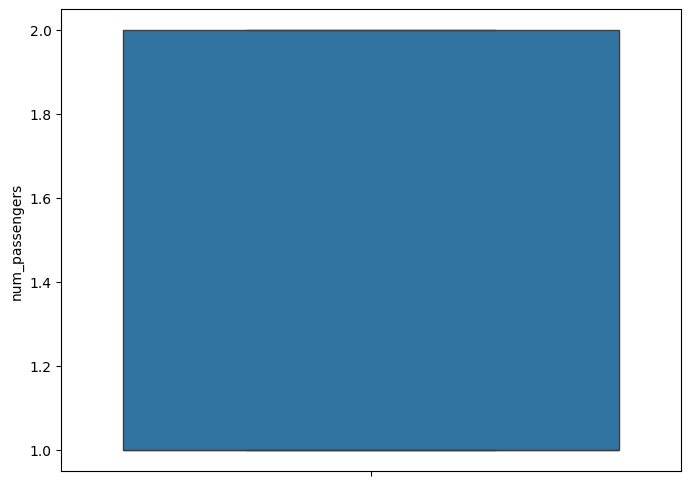

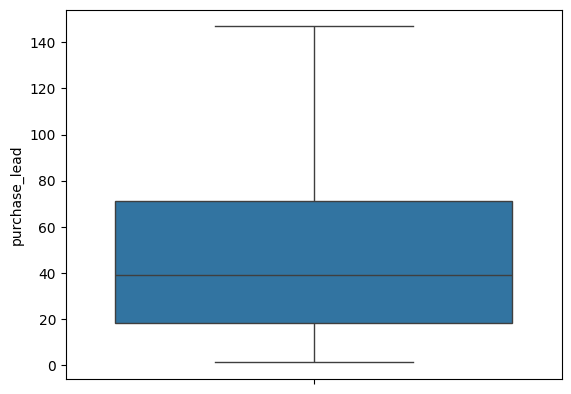

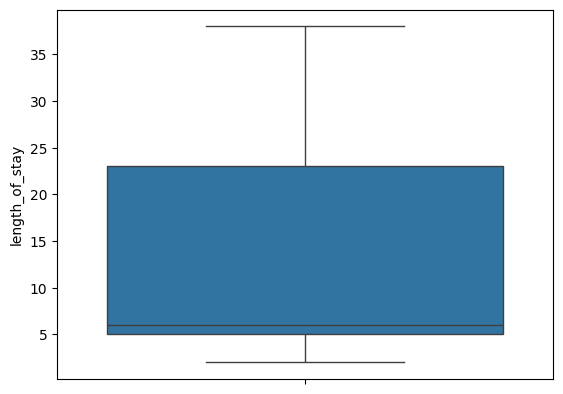

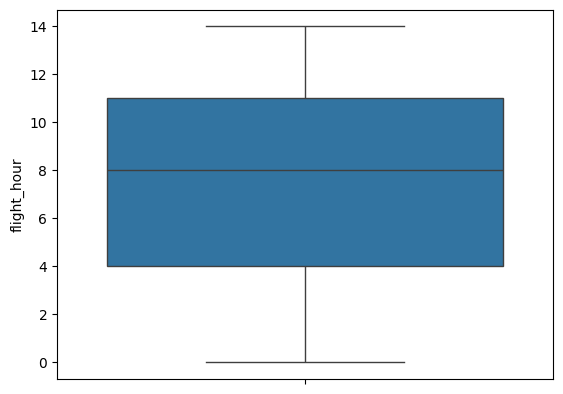

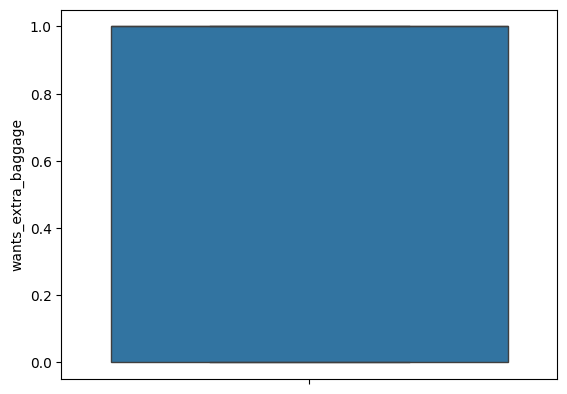

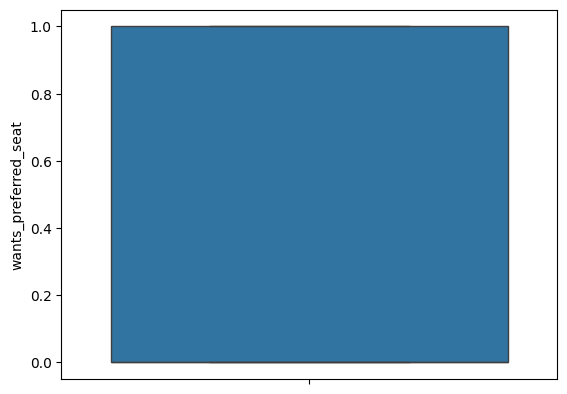

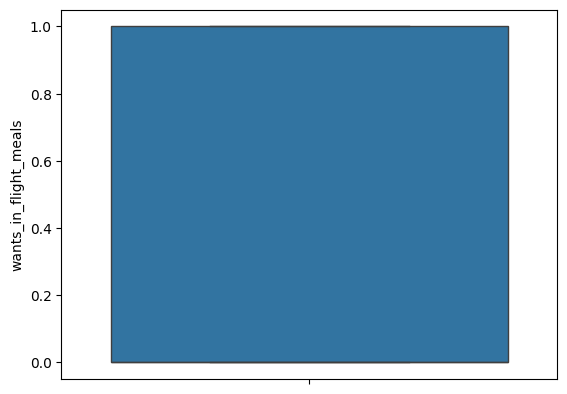

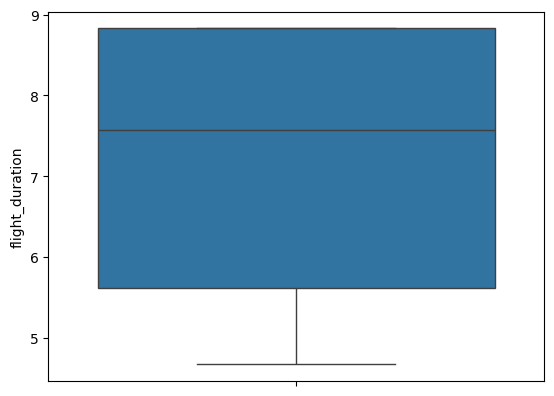

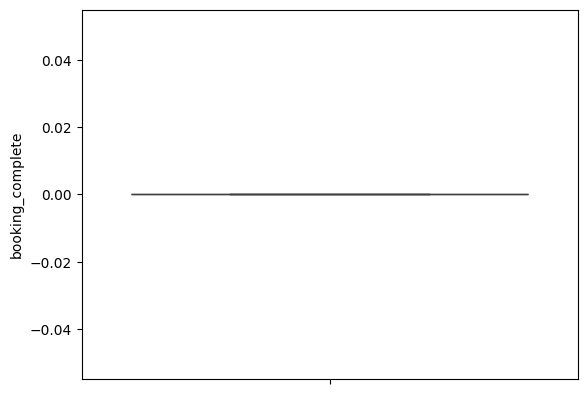

In [214]:
plt.figure(figsize=(8,6))
for c in data_numerical.columns:
    sns.boxplot(data = data_numerical[c])
    plt.show()

In [215]:
data_numerical.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

2.4.Feature Scaling

In [216]:
# combining numerical and categorical column data
df = pd.concat([data_categorical,data_numerical], axis =1)

In [217]:
df.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,False,False,True,False,True,False,False,False,False,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,False,True,False,True,False,False,False,False,False,...,False,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0.0
2,False,False,True,False,False,False,False,False,True,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,True,False,True,False,False,False,False,False,...,False,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0.0
4,False,False,True,False,False,False,False,False,True,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
# Separating dependent and independent variables
X = df.drop(["booking_complete"] , axis=1)
y = df["booking_complete"]

In [219]:
# Using StandardScaler 
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X)

In [220]:
X_scaled = pd.DataFrame(X_scaled)

In [221]:
X_scaled .head()

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.760274,0.500000,0.214286,0.0,0.0,0.0,0.204327
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.650685,0.805556,0.285714,0.0,0.0,1.0,0.204327
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
y

0        NaN
1        0.0
2        NaN
3        0.0
4        NaN
        ... 
49995    0.0
49996    0.0
49997    NaN
49998    0.0
49999    0.0
Name: booking_complete, Length: 49281, dtype: float64

2.5.Checking Data is imbalanced or not

In [228]:
y.value_counts()

booking_complete
0.0    21330
Name: count, dtype: int64

The dataset is imbalanced

Class Imbalance is a quite common problem and if not handled can have a impact on the model performance.


To create a balanced datase we will use SMOTE

In [224]:
print(X.shape)
print(y.shape)

(49281, 918)
(49281,)


In [226]:
# using imblearn to removing imablance in our dataset
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_scaled, y)
print(x_smote.shape)
print(y_smote.shape)

c:\Users\Rahul\miniconda3\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

In [227]:
x_smote.head()

NameError: name 'x_smote' is not defined

In [ ]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

## 3.EXPLORATORY DATA ANALYSIS

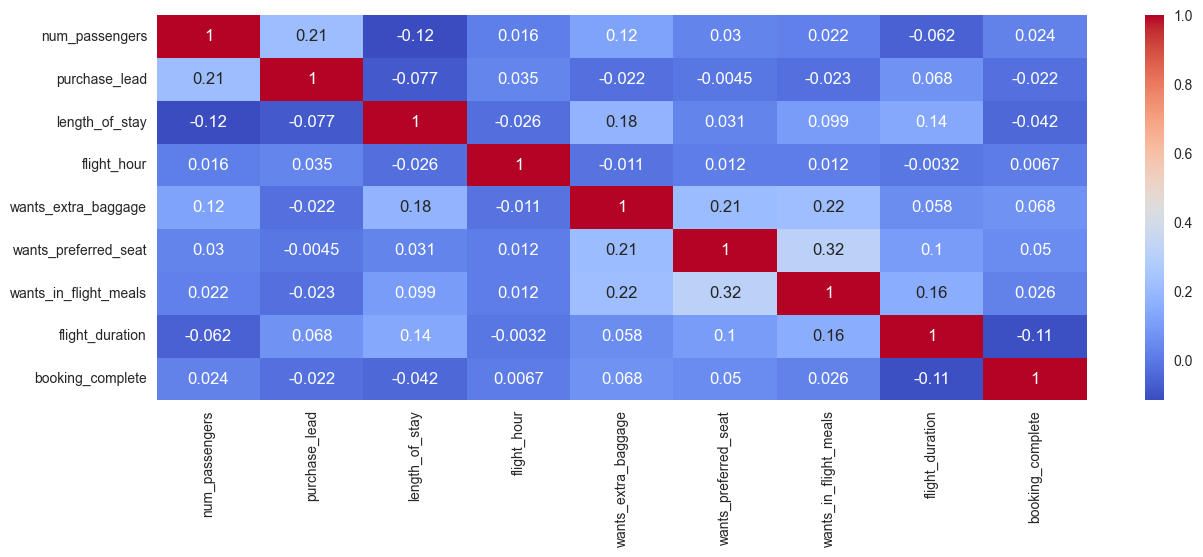

In [ ]:
# correlation
plt.figure(figsize=(15,5))
sns.heatmap(data_numerical.corr() , annot=True, cmap="coolwarm")
plt.show()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_17868\1707066524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['booking_complete'],palette=['#db3d13',"#008080"])
C:\Users\Rahul\AppData\Local\Temp\ipykernel_17868\1707066524.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Incomplete','Complete'])


[Text(0, 0, 'Incomplete'), Text(0, 1, 'Complete')]

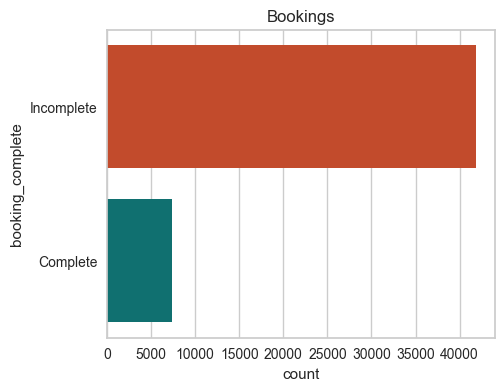

In [ ]:
#bookings
plt.figure(figsize=(5,4))
ax = sns.countplot(y=df['booking_complete'],palette=['#db3d13',"#008080"]) 
ax.set_title('Bookings')
ax.set_yticklabels(['Incomplete','Complete'])

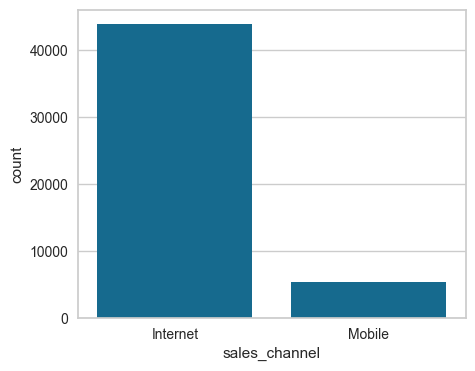

In [ ]:
# Frequently used Booking channel
plt.figure(figsize=(5,4))
sns.countplot(x = "sales_channel", data=data, order=data["sales_channel"].value_counts().index)
plt.show()

In [ ]:
#SALES CHANNEL
per_internet = df.sales_channel_Mobile.value_counts().values[0] / df.sales_channel_Mobile.count () *100
per_mobile = df.sales_channel_Mobile.value_counts().values[1] / df.sales_channel_Mobile.count () *100
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 89.11548061118889 %
Number of bookings done through phone call: 10.884519388811103 %


 So here we can see the that most of the booking searches were done through internet.

<Figure size 500x400 with 0 Axes>

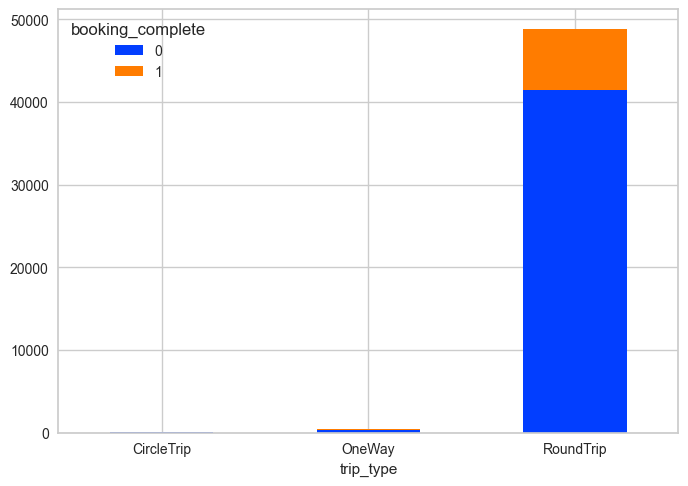

In [ ]:
#trip_type
plt.figure(figsize=(5,4))
sns.set_palette("bright")
contingency_table = pd.crosstab(data['trip_type'], data['booking_complete'])
# plotting the above contingency table
axy=contingency_table.plot(kind="bar", stacked = True, rot = 0)

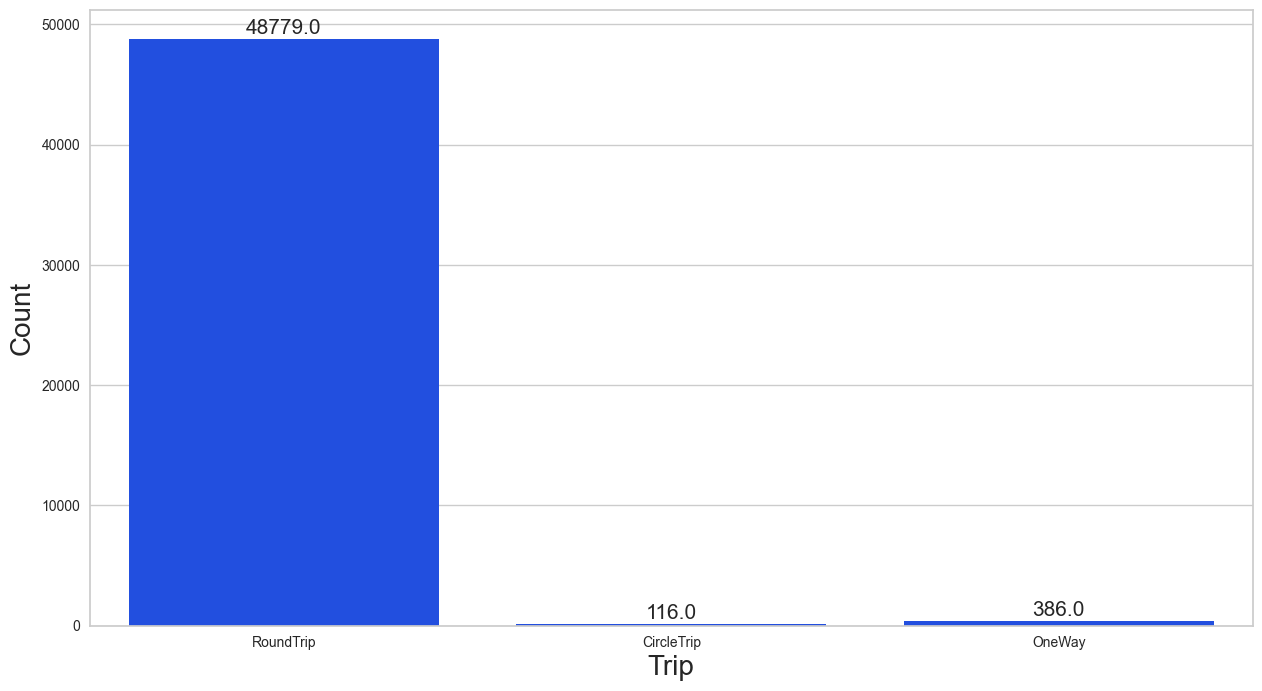

In [ ]:
# Most frequently opted trip type
plt.figure(figsize=(15,8))
plots = sns.countplot(x="trip_type",  data=data)
plt.xlabel("Trip",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')   

In [ ]:
# TRIP TYPE
per_oneway = df.trip_type_OneWay.value_counts().values[1]/ df.trip_type_OneWay.count() *100
per_round = df.trip_type_RoundTrip.value_counts().values[0]/ df.trip_type_RoundTrip.count() *100
per_circle=100-(per_oneway+per_round)
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.98135183945132 %
Percentage of One way trips: 0.7832633266370407 %
Percentage of circle trips: 0.23538483391163822 %


And Most of the passengers prefer to book round trip.

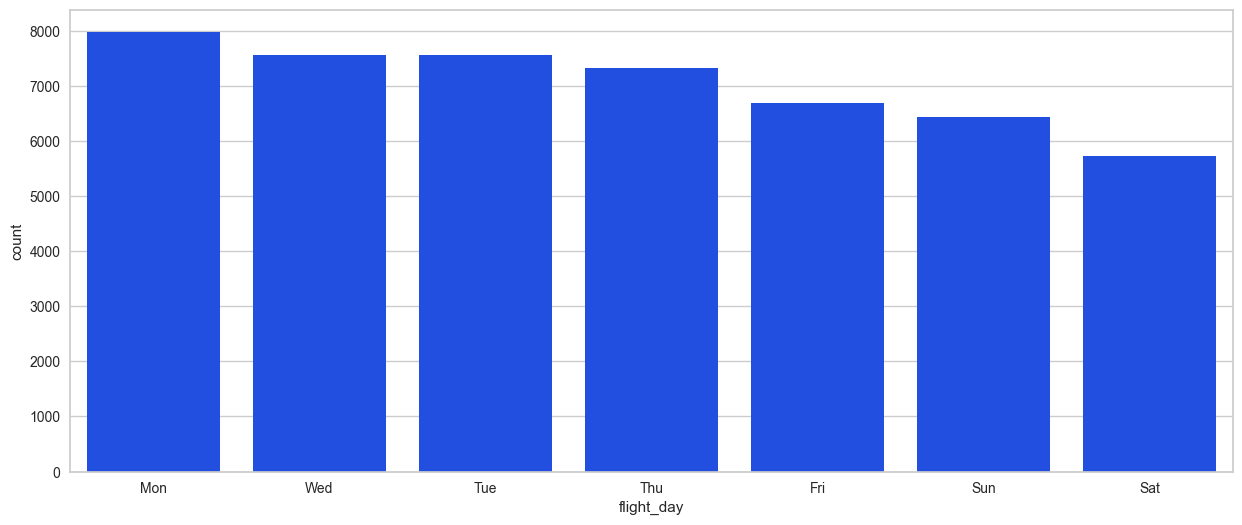

In [ ]:
# No. of flights on each day of the week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day", data=data, order=data["flight_day"].value_counts().index)
plt.show()

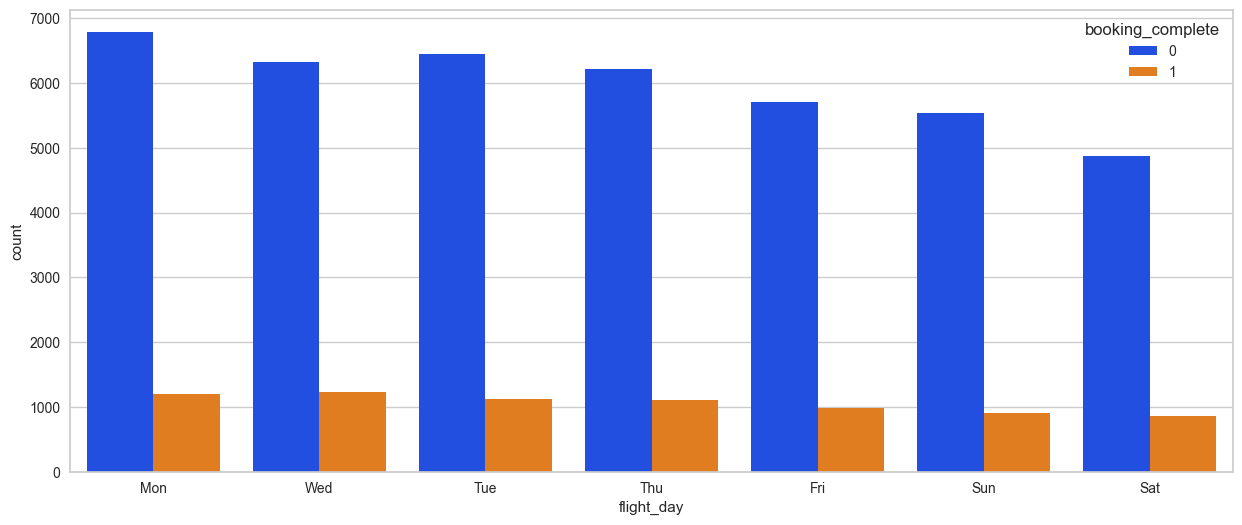

In [ ]:
# No. of flights on each day of the week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day",hue = "booking_complete", data=data, order=data["flight_day"].value_counts().index)
plt.show()

No of flights is max on monday and lowest on Saturday

In [ ]:
data["booking_origin"].value_counts(ascending=False)

booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

Top 10 countries with flight bookings.


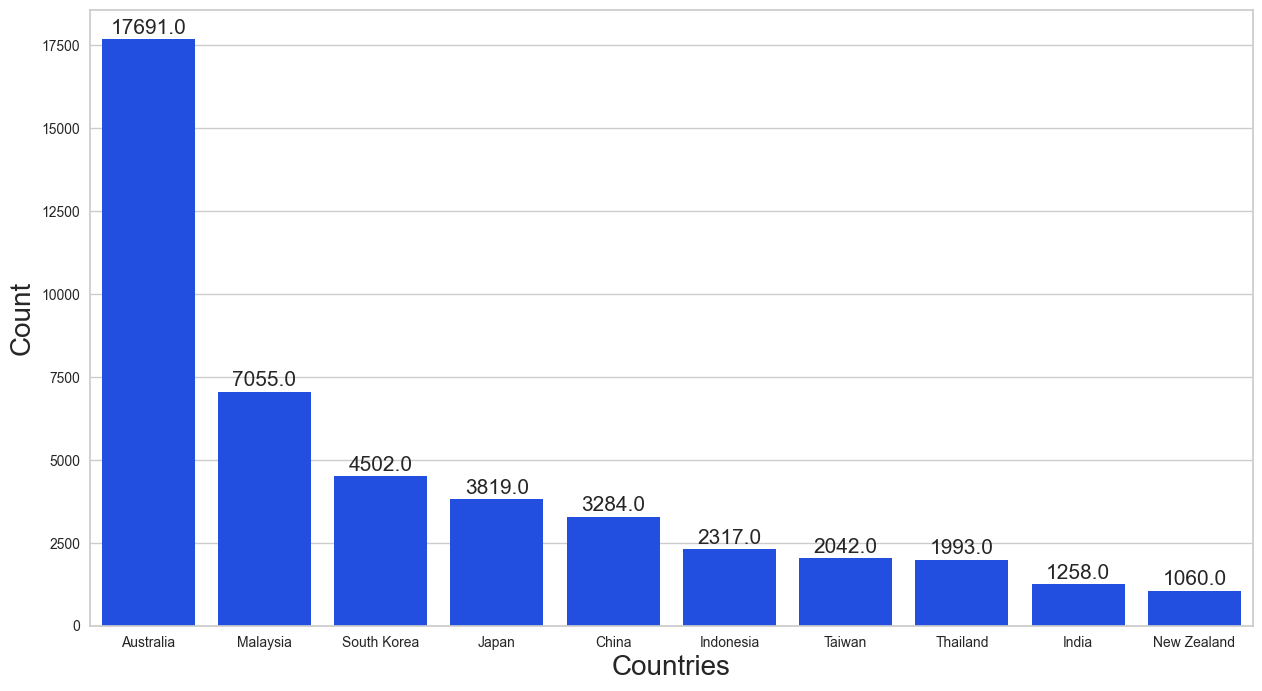

In [ ]:
# Top 10 Countries in flight bookings
print("Top 10 countries with flight bookings.")
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=data ,order=data.booking_origin.value_counts().iloc[:10].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points') 

Bottom 10 countries with flight bookings.


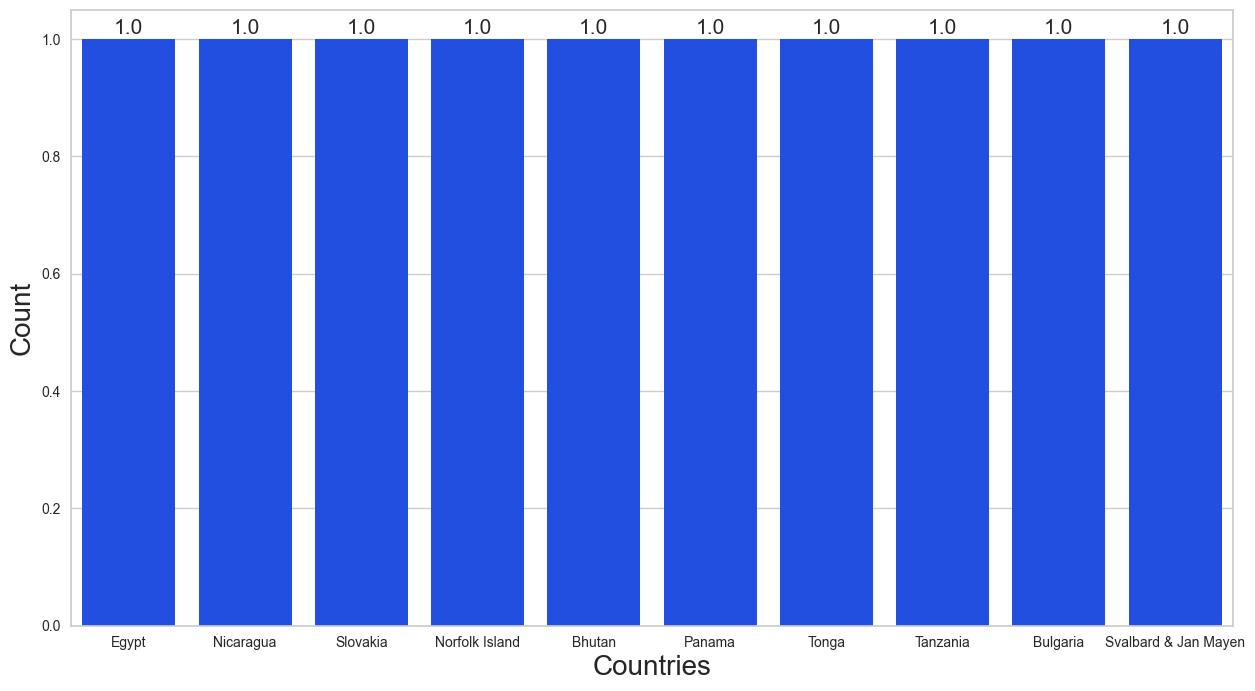

In [ ]:
print("Bottom 10 countries with flight bookings.")
# Bottom 10 Countries in flight bookings
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=data ,order=data.booking_origin.value_counts().iloc[-10:].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')    

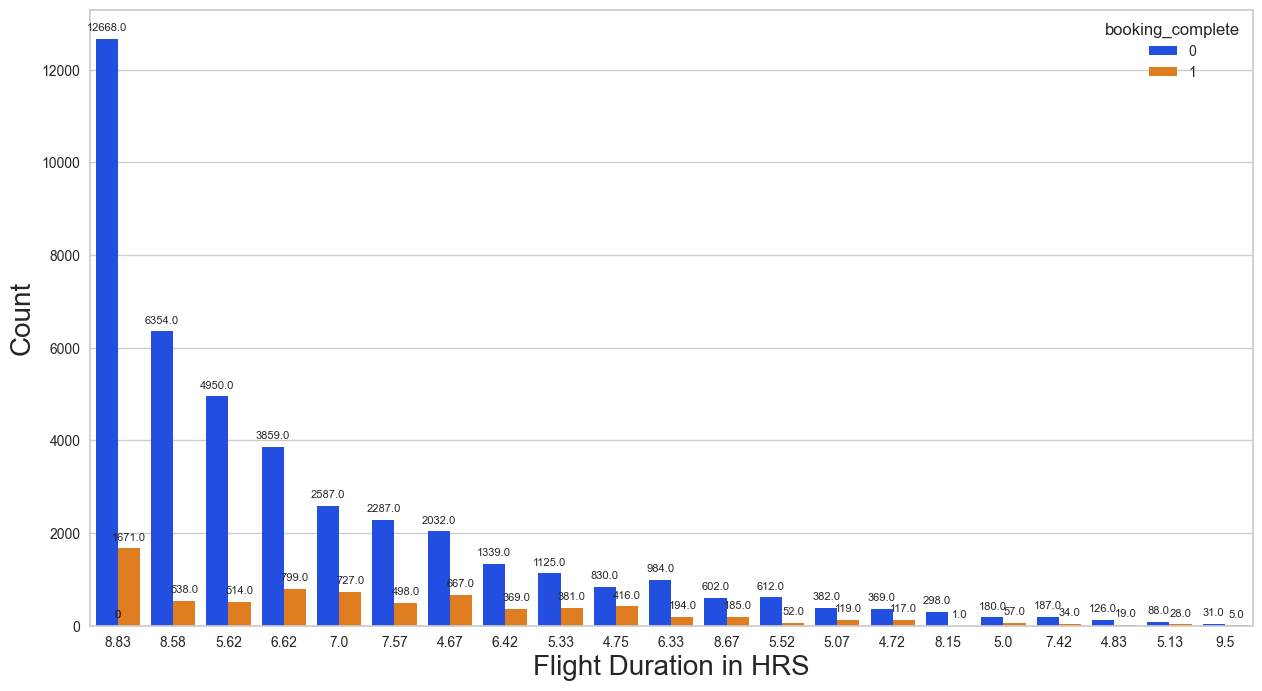

In [ ]:
# Flight hour and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="flight_duration", hue="booking_complete" , data=data ,order=data.flight_duration.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')   

Majority of the Passengers are not opting for British airways flights which has flights duration >=8.

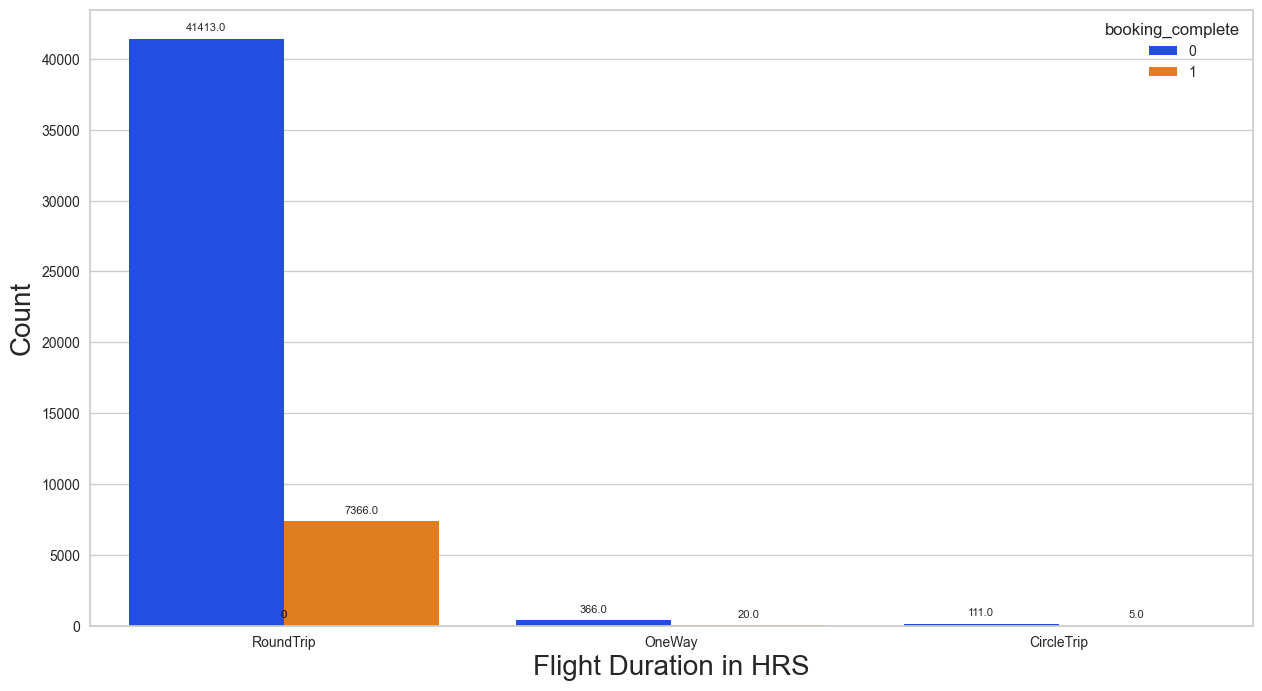

In [ ]:
# trip type and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="trip_type", hue="booking_complete" , data=data ,order=data.trip_type.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')  

Most of the enquires are from passengers who are looking for round trip.

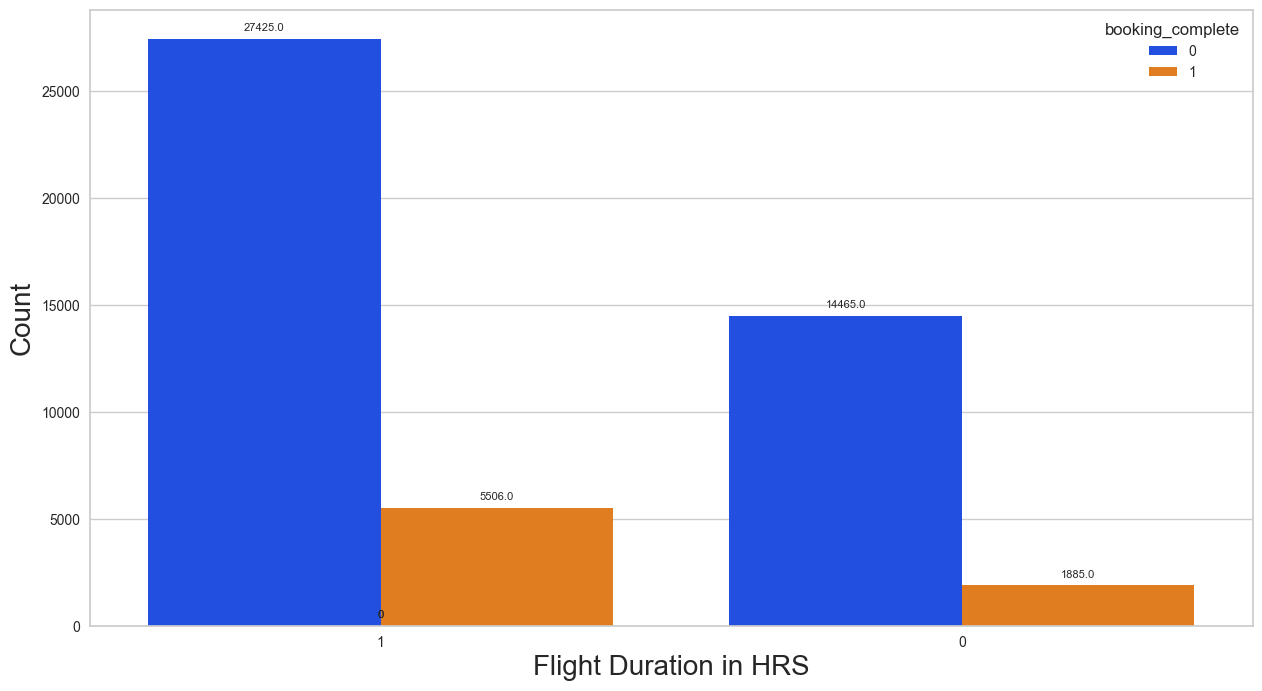

In [ ]:
# trip type and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="wants_extra_baggage", hue="booking_complete" , data=data ,order=data.wants_extra_baggage.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')  

## 4.MODEL TRAINING

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.25,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(62835, 918)
(20945, 918)
(62835,)
(20945,)


## 5.MODEL BUILDING

In [ ]:
# using random forest classifier
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf_train = rforest.predict(x_train)
y_pred_rf_test = rforest.predict(x_test)

## 6.Performance Metrics

Checking Training Accuracy

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

Checking Testing Accuracy

0.9194557173549773

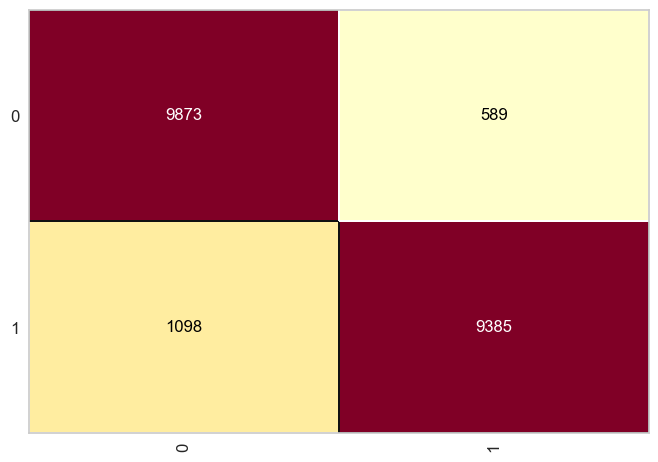

In [ ]:
cm = ConfusionMatrix(rforest, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

Classification Report

In [ ]:
print(classification_report(y_train, y_pred_rf_train))
print("####"*30)
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31428
           1       1.00      1.00      1.00     31407

    accuracy                           1.00     62835
   macro avg       1.00      1.00      1.00     62835
weighted avg       1.00      1.00      1.00     62835

########################################################################################################################
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10462
           1       0.94      0.90      0.92     10483

    accuracy                           0.92     20945
   macro avg       0.92      0.92      0.92     20945
weighted avg       0.92      0.92      0.92     20945



In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf_test)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_rf_test)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')

Accuracy: 0.9195
AUC-ROC Score: 0.92


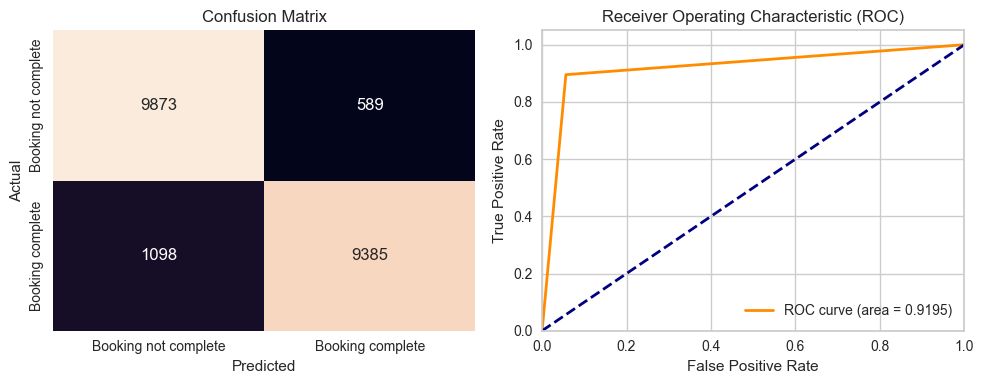

In [ ]:
# Plot confusion matrix and ROC curve
confusion = confusion_matrix(y_test, y_pred_rf_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cbar=False, ax=ax1)

# Customize the Confusion Matrix plot
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_xticks([0.5, 1.5])
ax1.set_yticks([0.5, 1.5])
ax1.set_xticklabels(['Booking not complete', 'Booking complete'])
ax1.set_yticklabels(['Booking not complete', 'Booking complete'])

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_test)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC)')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

cross validation

In [ ]:
# Using K-FOLD method by using cross_val_score
acc= cross_val_score(rforest, x_train, y_train, cv=3)

In [ ]:
acc

array([0.90790165, 0.91167343, 0.91186441])

Key Features Influencing Customer Bookings

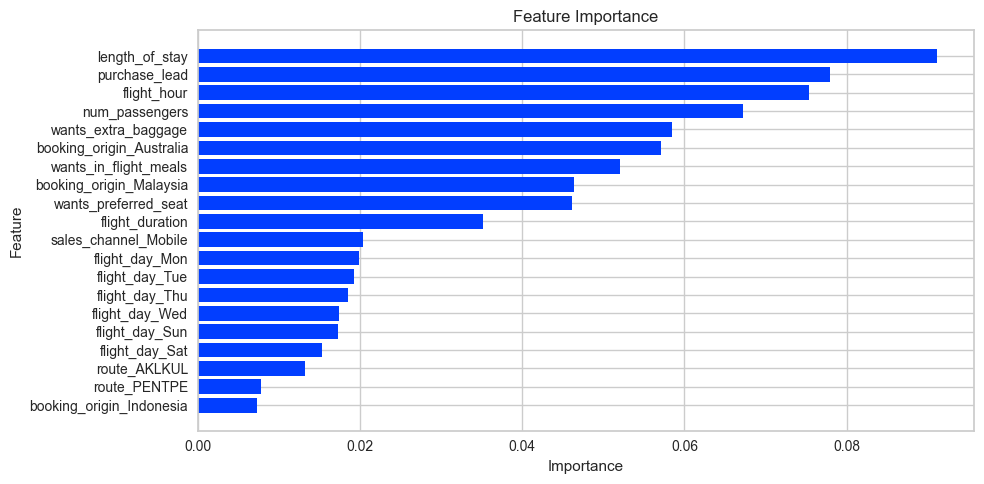

In [ ]:
plt.figure(figsize=(10,5))
sorted_idx = rforest.feature_importances_.argsort()
plt.barh(df.iloc[:,:-1].columns[sorted_idx[898:918]], rforest.feature_importances_[sorted_idx[898:918]])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Feature Importance')
plt.tight_layout()
plt.show()

Top 20 key features incluencing customer bookings

## CONCLUSION

This comprehensive analysis successfully developed a RandomForest machine learning model to predict customer booking behaviors for British Airways. The model validated with performance metrics, demonstrated a notable accuracy of 92% and AUC of 0.91. The study highlighted booking_origin and route as pivotal factors in booking completion.